## US Housing Market Analysis 

#### By: Rena Han & Cole Yang

**Overview**

For our Data Bootcamp project, we decided to study how the domestic housing market has evolved over the course of the last 19 years. Specifically, we wanted to take a look at changes in the demographic and economic factors related to housing price, such as the change in population and income per capita. To best analyze these relationships, we decided to consolidate the data on a county-specific level, which we believe will offer sufficient detail. 

Because this analysis was only conducted on the US housing market, its findings are not applicable to the housing markets in other international countries. Furthermore, because there are many other factors that influence housing price beyond just population and income per capita (quality of education, weather, etc.), this analysis is far from conclusive. Nonetheless, we hope that our project can bring to life some interesting insights.  

**Data**

The key elements of this project are the use of the Bureau of Economic Analysis' API and Zillow's housing data (coming from Zillow Research). These two sources will provide access to the above mentioned demographic and economic factors at the correct geographic level between the years of 1998 and 2017. 

From BEA
- regional accounts data on a county level (population and income per capita) 
 
From Zillow
- housing price data for single-family homes (in excel format) 

### Setup

In the following steps, we import the necessary modules

In [80]:
import pandas as pd 
import requests 
import numpy as np 
import matplotlib.pyplot as plt 
import weightedcalcs as wc
import datetime as dt
import seaborn as sns

%matplotlib inline

### Grabbing the data

Here we use a BEA API key (from class) to grab income per capita and population for all years between 1998 and 2017

In [81]:
BEA_ID = "6BF79D8C-8042-4196-88DC-0E0C55B0C3B6" 

my_key = "https://APPS.BEA.gov/api/data?&UserID=" + BEA_ID 

data_set =  "&method=GetData&" + "datasetname=RegionalIncome&"

table_and_line_income = "TableName=CA1&LineCode=3&" 

table_and_line_population = "TableName=CA1&LineCode=2&" 

year = "Year=" + "1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017" + "&" 

location = "GeoFips=COUNTY&" 

form = "ResultFormat=JSON" 

### Creating the income dataframe

In [82]:
API_URL = my_key + data_set + table_and_line_income + year + location + form

r = requests.get(API_URL)

df_income = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

In [83]:
df_income.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT"], axis=1, inplace = True)

df_income.rename(columns={"DataValue":"IncomePerCapita"}, inplace=True)

In [84]:
df_income.head(10)

,IncomePerCapita,GeoFips,GeoName,TimePeriod
0,"19,621",00000,United States,1990
1,"20,030",00000,United States,1991
2,"21,090",00000,United States,1992
3,"21,733",00000,United States,1993
4,"22,575",00000,United States,1994
5,"23,607",00000,United States,1995
6,"24,771",00000,United States,1996
7,"25,993",00000,United States,1997
8,"27,557",00000,United States,1998
9,"28,675",00000,United States,1999


### Creating the population dataframe

In [85]:
API_URL = my_key + data_set + table_and_line_population + year + location + form

r = requests.get(API_URL)

population = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

population.drop(['CL_UNIT', 'Code',"NoteRef", "UNIT_MULT", "GeoName"], axis=1, inplace = True)

population.rename(columns={"DataValue":"Pop"}, inplace=True)

In [86]:
population.head(10)

,Pop,GeoFips,TimePeriod
0,"249,622,814",00000,1990
1,"252,980,941",00000,1991
2,"256,514,224",00000,1992
3,"259,918,588",00000,1993
4,"263,125,821",00000,1994
5,"266,278,393",00000,1995
6,"269,394,284",00000,1996
7,"272,646,925",00000,1997
8,"275,854,104",00000,1998
9,"279,040,168",00000,1999


### Merging the two dataframes 

In [87]:
pop_income = pd.merge(population, df_income,   
                 how='left',      
                 on=['GeoFips',"TimePeriod"],       
                 indicator=True)  

We set the index to GeoFips so that the data will be easier to work with later on

In [88]:
pop_income.set_index("GeoFips", inplace = True)

Some basic information about the merged pop_income df

In [89]:
pop_income.shape

(89544, 5)

In [90]:
pop_income.dtypes

Pop                  object
TimePeriod           object
IncomePerCapita      object
GeoName              object
_merge             category
dtype: object

In [91]:
pop_income.head(10)

,Pop,TimePeriod,IncomePerCapita,GeoName,_merge
GeoFips,,,,,
00000,"249,622,814",1990,"19,621",United States,both
00000,"252,980,941",1991,"20,030",United States,both
00000,"256,514,224",1992,"21,090",United States,both
00000,"259,918,588",1993,"21,733",United States,both
00000,"263,125,821",1994,"22,575",United States,both
00000,"266,278,393",1995,"23,607",United States,both
00000,"269,394,284",1996,"24,771",United States,both
00000,"272,646,925",1997,"25,993",United States,both
00000,"275,854,104",1998,"27,557",United States,both


In [92]:
pop_income.tail(10)

,Pop,TimePeriod,IncomePerCapita,GeoName,_merge
GeoFips,,,,,
98000,"51,608,614",2008,"43,214",Far West,both
98000,"52,167,532",2009,"41,298",Far West,both
98000,"52,686,778",2010,"42,636",Far West,both
98000,"53,176,406",2011,"44,966",Far West,both
98000,"53,679,832",2012,"47,451",Far West,both
98000,"54,161,802",2013,"47,819",Far West,both
98000,"54,695,081",2014,"50,787",Far West,both
98000,"55,249,155",2015,"53,911",Far West,both
98000,"55,772,858",2016,"55,550",Far West,both


In [93]:
pop_income.to_excel("Population Income.xlsx") # converting to excel so we can doublecheck our changes

### Bringing in the Zillow dataset

In [94]:
file = "https://github.com/zcy204/data_bootcamp_final_project/raw/master/zillowdata.xlsx" # from Zillow Home Value Index 
zillow = pd.read_excel(file)

In [95]:
zillow.drop(['RegionID',"State", "NEW STATE CODE", "MunicipalCodeFIPS", "NEW FIPS", "SizeRank"], axis=1, inplace = True)

In [96]:
zillow.head(10)

,RegionName,StateCodeFIPS,GEOFIPS,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2017
0,Autauga County,1,1001,109900.0,110300.0,110600.0,110800.0,110900.0,111000.0,111000.0,...,144300,144400,144300,144000,143300,142800,143000,142700,142700,143333.333333
1,Baldwin County,1,1003,101500.0,102400.0,102800.0,102900.0,102600.0,102300.0,102000.0,...,180700,180300,179500,179000,179100,179500,179200,178900,178200,179808.333333
2,Blount County,1,1009,79200.0,80600.0,81600.0,82600.0,83500.0,84200.0,84900.0,...,131300,131800,132200,132500,132200,131900,132000,132100,132000,131541.666667
3,Cherokee County,1,1019,62100.0,62900.0,63600.0,64300.0,64800.0,65400.0,65800.0,...,105000,105600,105900,105300,104700,104100,103400,102500,102200,104000.000000
4,Chilton County,1,1021,82600.0,83000.0,83300.0,83600.0,83900.0,84200.0,84400.0,...,111600,112600,113200,113500,113900,114400,114400,114300,114200,112758.333333
5,Coffee County,1,1031,79600.0,78900.0,78400.0,77900.0,77700.0,77600.0,77700.0,...,106000,106400,106700,107500,108400,109400,110100,110300,109900,107558.333333
6,Colbert County,1,1033,40100.0,40000.0,40000.0,40000.0,39800.0,39500.0,39100.0,...,94400,94900,94900,94900,95000,95300,95200,95000,95000,94541.666667
7,De Kalb County,1,1049,56600.0,56300.0,56300.0,56700.0,57300.0,58300.0,59400.0,...,89200,89900,90200,90500,90900,90900,90900,90900,90900,90041.666667
8,Elmore County,1,1051,112100.0,112900.0,113500.0,114100.0,114500.0,114700.0,114800.0,...,153100,153100,153300,153500,153300,153100,152900,152700,153100,152858.333333
9,Etowah County,1,1055,65200.0,65700.0,65900.0,65800.0,65600.0,65200.0,64900.0,...,91100,91300,91000,90400,90300,90500,90800,91000,90500,90683.333333


### Cleaning the data

Because values in the GEOFIPS column are stored as integers instead of strings, many of them are missing 0s. For example, Autauga County should have a GEOFIPS of 01001, but because its an integer, the 0 dissapears and the GEOFIPS is incorrectly shown as 1001. Below, we wrote a for loop in order to fix that issue and update the GEOFIPS column with the correct values. 

In [97]:
values = zillow['GEOFIPS'].tolist()

In [98]:
newval = []
for val in values:
    if len(str(val)) != 5:
        val = '0' + str(val)
        newval.append(val)
    else:
        val = val
        newval.append(val)
    

In [99]:
zillow['GEOFIPS'] = newval

In [100]:
zillow['GEOFIPS'] 

0       01001
1       01003
2       01009
3       01019
4       01021
5       01031
6       01033
7       01049
8       01051
9       01055
10      01063
11      01069
12      01073
13      01077
14      01081
15      01083
16      01089
17      01097
18      01101
19      01109
20      01113
21      01115
22      01117
23      01121
24      01123
25      01125
26      01133
27      02020
28      02090
29      02110
        ...  
1881    55113
1882    55115
1883    55121
1884    55123
1885    55125
1886    55127
1887    55131
1888    55133
1889    55135
1890    55137
1891    55139
1892    55141
1893    56001
1894    56005
1895    56009
1896    56013
1897    56015
1898    56017
1899    56019
1900    56021
1901    56023
1902    56025
1903    56029
1904    56031
1905    56033
1906    56037
1907    56039
1908    56041
1909    56043
1910    56045
Name: GEOFIPS, Length: 1911, dtype: object

Sorting values by StateCodeFIPS and RegionName allows us to first order the data alphabetically by state and then again alphabetically by county name within each state. For example, Alabama has StateCodeFips 1 so after sorting, all of the Alabama counties show up first, with counties like Autauga, Baldwin, Cherokee, etc. also ranked accordingly. 

In [101]:
zillow.sort_values(by=['StateCodeFIPS', 'RegionName'], inplace = True) #trial and error 

In [102]:
zillow.drop(['StateCodeFIPS'], axis = 1, inplace = True )

In [103]:
zillow.columns

Index(['RegionName',    'GEOFIPS',    '1998-01',    '1998-02',    '1998-03',
          '1998-04',    '1998-05',    '1998-06',    '1998-07',    '1998-08',
       ...
          '2017-04',    '2017-05',    '2017-06',    '2017-07',    '2017-08',
          '2017-09',    '2017-10',    '2017-11',    '2017-12',         2017],
      dtype='object', length=262)

In [104]:
newcol = ['RegionName','GEOFIPS',1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [105]:
zillow = zillow[newcol]

In [106]:
zillow.head(10)

,RegionName,GEOFIPS,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Autauga County,01001,110558.333333,111250.000000,115125.000000,109325.000000,118983.333333,122391.666667,128516.666667,133633.333333,...,145258.333333,144341.666667,142366.666667,136208.333333,133766.666667,133691.666667,139225.000000,136991.666667,138950.000000,143333.333333
1,Baldwin County,01003,102433.333333,112983.333333,128941.666667,116558.333333,141233.333333,132908.333333,145566.666667,168383.333333,...,189783.333333,170208.333333,157800.000000,148683.333333,153800.000000,156766.666667,163416.666667,172216.666667,179191.666667,179808.333333
2,Blount County,01009,84300.000000,92058.333333,94000.000000,91233.333333,102700.000000,105533.333333,109033.333333,119783.333333,...,130791.666667,128533.333333,110083.333333,110466.666667,119991.666667,118716.666667,119150.000000,122291.666667,127150.000000,131541.666667
3,Cherokee County,01019,65075.000000,67283.333333,71141.666667,69208.333333,77825.000000,79550.000000,81883.333333,84075.000000,...,102583.333333,96250.000000,94366.666667,89591.666667,82991.666667,83083.333333,89591.666667,95650.000000,97166.666667,104000.000000
4,Chilton County,01021,84183.333333,87950.000000,90741.666667,84783.333333,93691.666667,98908.333333,100375.000000,88366.666667,...,97033.333333,98808.333333,92766.666667,92891.666667,96733.333333,103141.666667,102283.333333,103658.333333,106008.333333,112758.333333
5,Coffee County,01031,78391.666667,79166.666667,80216.666667,76516.666667,85458.333333,87508.333333,90675.000000,96041.666667,...,111683.333333,119516.666667,112941.666667,108283.333333,119341.666667,108958.333333,103133.333333,103508.333333,104725.000000,107558.333333
6,Colbert County,01033,38958.333333,39550.000000,45375.000000,48808.333333,60750.000000,73991.666667,80858.333333,86950.000000,...,92791.666667,90725.000000,83266.666667,86550.000000,87150.000000,86408.333333,84983.333333,88283.333333,90825.000000,94541.666667
7,De Kalb County,01049,59508.333333,64316.666667,67250.000000,64291.666667,71625.000000,73725.000000,75625.000000,74300.000000,...,91391.666667,89375.000000,85900.000000,86300.000000,83525.000000,80050.000000,80550.000000,81991.666667,86016.666667,90041.666667
8,Elmore County,01051,114058.333333,116125.000000,121291.666667,116050.000000,148950.000000,137016.666667,136883.333333,159050.000000,...,185091.666667,170616.666667,175791.666667,168150.000000,163050.000000,163575.000000,152091.666667,152333.333333,150641.666667,152858.333333
9,Etowah County,01055,64750.000000,61183.333333,65616.666667,67508.333333,75483.333333,79608.333333,81975.000000,87016.666667,...,103283.333333,96266.666667,92750.000000,83425.000000,84475.000000,83475.000000,83783.333333,84691.666667,85991.666667,90683.333333


### Preparing for the pop_income and Zillow merge

The Zillow data came in a format that was very wide, which was going to be an issue if we needed to merge it with the pop_income dataframe, which was long. Transposing didn't work, so instead we used the melt function. Our two identifier variables were Regionname and GEOFIPS, which we kept set (id_vars). 

In [107]:
zillowdf = zillow.melt(id_vars = ['RegionName','GEOFIPS'])

In [108]:
zillowdf.columns = ['RegionName', 'GeoFips', 'TimePeriod','Median_Housing_Price']

In [109]:
zillowdf.set_index('GeoFips', inplace = True)

In [110]:
zillowdf = zillowdf.reset_index()

In [111]:
zillowdf['Median_Housing_Price'] = np.round(zillowdf['Median_Housing_Price'], decimals=2)

In [112]:
zillowdf.head(10)

,GeoFips,RegionName,TimePeriod,Median_Housing_Price
0,01001,Autauga County,1998,110558.33
1,01003,Baldwin County,1998,102433.33
2,01009,Blount County,1998,84300.00
3,01019,Cherokee County,1998,65075.00
4,01021,Chilton County,1998,84183.33
5,01031,Coffee County,1998,78391.67
6,01033,Colbert County,1998,38958.33
7,01049,De Kalb County,1998,59508.33
8,01051,Elmore County,1998,114058.33
9,01055,Etowah County,1998,64750.00


In [113]:
zillowdf.tail(10)

,GeoFips,RegionName,TimePeriod,Median_Housing_Price
38210,56023,Lincoln County,2017,210408.33
38211,56025,Natrona County,2017,199000.00
38212,56029,Park County,2017,233491.67
38213,56031,Platte County,2017,178666.67
38214,56033,Sheridan County,2017,227908.33
38215,56037,Sweetwater County,2017,221233.33
38216,56039,Teton County,2017,762708.33
38217,56041,Uinta County,2017,203333.33
38218,56043,Washakie County,2017,169325.00
38219,56045,Weston County,2017,138875.00


### Preparing the pop_income dataframe for merging

In [114]:
pop_income = pop_income.reset_index()

In [115]:
pop_income = pop_income.drop(['_merge'], axis = 1)

In [116]:
pop_income

,GeoFips,Pop,TimePeriod,IncomePerCapita,GeoName
0,00000,"249,622,814",1990,"19,621",United States
1,00000,"252,980,941",1991,"20,030",United States
2,00000,"256,514,224",1992,"21,090",United States
3,00000,"259,918,588",1993,"21,733",United States
4,00000,"263,125,821",1994,"22,575",United States
5,00000,"266,278,393",1995,"23,607",United States
6,00000,"269,394,284",1996,"24,771",United States
7,00000,"272,646,925",1997,"25,993",United States
8,00000,"275,854,104",1998,"27,557",United States
9,00000,"279,040,168",1999,"28,675",United States


In [117]:
US = pop_income.set_index('GeoFips').loc['00000']

In [118]:
updateinc = []
for val in US['IncomePerCapita']:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        updateinc.append(val)
    else:
        updateinc.append(0)

In [119]:
newpop = []
for val in US['Pop']:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        newpop.append(val)
    else:
        newpop.append(0)

In [120]:
US['Pop'] = newpop
US['IncomePerCapita'] = updateinc

In [121]:
US['Pop'] = US['Pop'].astype(int) / 1000000

In [122]:
US['Pop'] = np.round(US['Pop'], decimals=2)

In [123]:
US.set_index('TimePeriod', inplace = True)

In [124]:
US

,Pop,IncomePerCapita,GeoName
TimePeriod,,,
1990,249.62,19621,United States
1991,252.98,20030,United States
1992,256.51,21090,United States
1993,259.92,21733,United States
1994,263.13,22575,United States
1995,266.28,23607,United States
1996,269.39,24771,United States
1997,272.65,25993,United States
1998,275.85,27557,United States


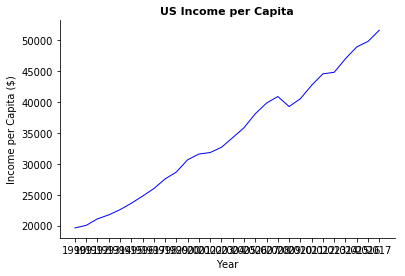

In [125]:
fig, ax = plt.subplots()

ax.plot(US.index, US.IncomePerCapita, color = 'b', linewidth = '1')
ax.set_title("US Income per Capita", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Income per Capita ($)")
ax.set_xlabel("Year")

#ax.set_xlim(dt.datetime(1998,1,1),dt.datetime(2017,12,31)) 
#ax.set_xlim(1998,2017.5)
#ax.set_ylim(90000,170000)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

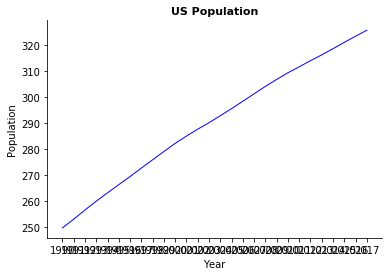

In [126]:
fig, ax = plt.subplots()

ax.plot(US.index, US.Pop, color = 'b', linewidth = '1')
ax.set_title("US Population", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Population")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Here we drop all the observations not directly related to a US county

In [127]:
pop_income = pop_income.set_index(['GeoName'])

In [128]:
pop_income = pop_income.drop(['United States',
'New England',
'Mideast',
'Great Lakes',
'Plains',
'Southeast',
'Southwest',
'Rocky Mountain',
'Far West',
'District of Columbia', 
'Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming'])


In [129]:
pop_income.reset_index()

,GeoName,GeoFips,Pop,TimePeriod,IncomePerCapita
0,"Autauga, AL",01001,"34,353",1990,"15,482"
1,"Autauga, AL",01001,"35,010",1991,"16,417"
2,"Autauga, AL",01001,"35,985",1992,"17,063"
3,"Autauga, AL",01001,"36,953",1993,"17,700"
4,"Autauga, AL",01001,"38,186",1994,"18,683"
5,"Autauga, AL",01001,"39,112",1995,"19,350"
6,"Autauga, AL",01001,"40,207",1996,"20,155"
7,"Autauga, AL",01001,"41,238",1997,"21,076"
8,"Autauga, AL",01001,"42,106",1998,"22,073"
9,"Autauga, AL",01001,"42,963",1999,"22,948"


Changing the type of TimePeriod and GeoFips in both pop_income and zillowdf into integer and string, respectively

In [130]:
pop_income['TimePeriod'] = pop_income['TimePeriod'].astype(int)
pop_income['GeoFips'] = pop_income['GeoFips'].astype(str)

In [131]:
zillowdf['TimePeriod'] = zillowdf['TimePeriod'].astype(int)
zillowdf['GeoFips'] = zillowdf['GeoFips'].astype(str)

### Merging the BEA pop_income and Zillow zillow_df dataframes

In [132]:
combo = pd.merge(pop_income, zillowdf,
                 on=['TimePeriod', 'GeoFips'],      
                 how = 'inner',   
                 indicator=True)  

In [133]:

combo = combo.dropna(axis = "rows") # removing the rows with NAN (no data available), some counties with 0 still remain



In [134]:
combo = combo[(combo['Median_Housing_Price'] != 0)]

In [135]:
combo.set_index(['GeoFips'], inplace = True)

In [136]:
combo = combo.drop(['_merge'], axis = 1)

Now, we have to update the income and population data to remove commas. This will make it easier to manipulate

In [137]:
income = combo['IncomePerCapita'].tolist()
pop = combo['Pop'].tolist()

In [138]:
updateinc = []
for val in income:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        updateinc.append(val)
    else:
        updateinc.append(0)

updateinc
    

[22073,
 22948,
 23699,
 24682,
 24991,
 26319,
 27535,
 28766,
 29758,
 31459,
 32876,
 32603,
 33415,
 34325,
 35040,
 35464,
 36677,
 38591,
 39509,
 40484,
 24643,
 25373,
 26757,
 27119,
 27402,
 28050,
 30338,
 32292,
 34784,
 36051,
 35751,
 34698,
 36282,
 37804,
 38166,
 38212,
 39561,
 41412,
 43004,
 44079,
 19265,
 19721,
 20291,
 21339,
 21304,
 22354,
 23543,
 24379,
 24787,
 26549,
 27661,
 27381,
 27754,
 28368,
 29600,
 30188,
 31359,
 31987,
 32261,
 33707,
 17722,
 18085,
 18584,
 19885,
 20241,
 21153,
 22545,
 23277,
 24116,
 26213,
 27437,
 27198,
 28021,
 28873,
 29564,
 30702,
 31457,
 32906,
 32758,
 34371,
 18551,
 19494,
 19690,
 21098,
 21428,
 22161,
 23420,
 24559,
 25967,
 27198,
 27448,
 27102,
 27513,
 28707,
 29458,
 29716,
 30580,
 31830,
 32268,
 33350,
 23044,
 24013,
 24285,
 25477,
 26169,
 27385,
 29253,
 29763,
 30456,
 32409,
 34052,
 34006,
 35513,
 36009,
 36137,
 37346,
 38111,
 39558,
 40319,
 42076,
 20473,
 20852,
 21561,
 21811,
 22242,


In [139]:
newpop = []
for val in pop:
    if ',' in val:
        val = val.replace(',', '')
        val = int(val)
        newpop.append(val)
    else:
        newpop.append(0)

newpop

[42106,
 42963,
 44021,
 44889,
 45909,
 46800,
 48366,
 49676,
 51328,
 52405,
 53277,
 54135,
 54750,
 55199,
 54927,
 54695,
 54864,
 54838,
 55278,
 55504,
 134444,
 137555,
 141342,
 144875,
 147957,
 151509,
 156266,
 162183,
 168121,
 172404,
 175827,
 179406,
 183110,
 186534,
 190048,
 194736,
 199064,
 202863,
 207509,
 212628,
 48824,
 50237,
 51107,
 51845,
 52551,
 53457,
 54124,
 54624,
 55485,
 56240,
 57055,
 57341,
 57381,
 57562,
 57595,
 57623,
 57546,
 57590,
 57562,
 58013,
 23351,
 23605,
 24006,
 24182,
 24403,
 24591,
 24887,
 25031,
 25466,
 25553,
 25636,
 25854,
 25973,
 25993,
 25958,
 26014,
 25897,
 25741,
 25766,
 25857,
 38069,
 38862,
 39897,
 40197,
 40683,
 41079,
 41534,
 41946,
 42318,
 42881,
 43239,
 43484,
 43661,
 43688,
 43601,
 43645,
 43779,
 43706,
 43830,
 44067,
 43509,
 43667,
 43580,
 43716,
 43930,
 44315,
 45053,
 45604,
 46228,
 47458,
 48516,
 49440,
 50203,
 50434,
 51113,
 50647,
 50652,
 50974,
 51217,
 51874,
 54928,
 54715,
 549

In [140]:
combo['IncomePerCapita'] = updateinc
combo['Pop'] = newpop

### Housing Affordability Index

We then calculated our Housing Affordability Index, which was based off of a similar formula from the Federal Reserve Bank of San Francisco (https://www.frbsf.org/education/publications/doctor-econ/2003/december/housing-affordability-index/). 

In [141]:
#combo['IncomePerCapita'] = pop_income['IncomePerCapita'].astype(int)
#combo['Avg Housing Price'] = pop_income['Avg Housing Pric'].astype(float)

combo['Housing_Affordability_Index'] = ((combo['IncomePerCapita'].astype(int) / combo['Median_Housing_Price'].astype(float)) * 100)



In [142]:
combo['Housing_Affordability_Index'] = np.round(combo['Housing_Affordability_Index'], decimals=2)

In [143]:
combo = combo[['RegionName','TimePeriod', 'Pop', 'IncomePerCapita', 'Median_Housing_Price', 'Housing_Affordability_Index']]



### Combined (combo) dataframe

Combo presents a big picture overview for all counties in the US (for all years 1998-2017) and the corresponding statistics

In [144]:
combo

,RegionName,TimePeriod,Pop,IncomePerCapita,Median_Housing_Price,Housing_Affordability_Index
GeoFips,,,,,,
01001,Autauga County,1998,42106,22073,110558.33,19.97
01001,Autauga County,1999,42963,22948,111250.00,20.63
01001,Autauga County,2000,44021,23699,115125.00,20.59
01001,Autauga County,2001,44889,24682,109325.00,22.58
01001,Autauga County,2002,45909,24991,118983.33,21.00
01001,Autauga County,2003,46800,26319,122391.67,21.50
01001,Autauga County,2004,48366,27535,128516.67,21.43
01001,Autauga County,2005,49676,28766,133633.33,21.53
01001,Autauga County,2006,51328,29758,150683.33,19.75


In [145]:
combo['Pop_Change'] = combo['Pop'].pct_change()
combo['Change_in_Housing_Price'] = combo['Median_Housing_Price'].pct_change()
combo['Change_in_IncomePerCapita'] = combo['IncomePerCapita'].pct_change()

In [146]:
combo = combo[['RegionName','TimePeriod','Pop', 'Pop_Change', 'IncomePerCapita', 'Change_in_IncomePerCapita', 'Median_Housing_Price', 'Change_in_Housing_Price', 'Housing_Affordability_Index']]


In [147]:
combo

,RegionName,TimePeriod,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
GeoFips,,,,,,,,,
01001,Autauga County,1998,42106,NaN,22073,NaN,110558.33,NaN,19.97
01001,Autauga County,1999,42963,0.020353,22948,0.039641,111250.00,0.006256,20.63
01001,Autauga County,2000,44021,0.024626,23699,0.032726,115125.00,0.034831,20.59
01001,Autauga County,2001,44889,0.019718,24682,0.041479,109325.00,-0.050380,22.58
01001,Autauga County,2002,45909,0.022723,24991,0.012519,118983.33,0.088345,21.00
01001,Autauga County,2003,46800,0.019408,26319,0.053139,122391.67,0.028646,21.50
01001,Autauga County,2004,48366,0.033462,27535,0.046202,128516.67,0.050044,21.43
01001,Autauga County,2005,49676,0.027085,28766,0.044707,133633.33,0.039813,21.53
01001,Autauga County,2006,51328,0.033255,29758,0.034485,150683.33,0.127588,19.75


In [148]:
combo.to_excel("Combo.xlsx") # converting to excel so we can doublecheck our changes

In [149]:
combo['Housing_Affordability_Index'].max()

237.77

### Final combination

In [152]:
fincombo = combo.groupby(['TimePeriod']).mean()

In [153]:
fincombo

,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,
1998,151721.177207,3.138870,23460.142142,-0.438147,92587.095711,-0.315256,28.775385
1999,153613.639950,0.011814,24299.634314,0.034764,98366.864903,0.062849,27.961127
2000,155487.721979,0.012766,25701.674389,0.055321,105051.450683,0.057994,27.955554
2001,157204.631183,0.008374,26794.034440,0.044549,102757.112254,-0.028041,30.122686
2002,158807.139011,inf,27143.541014,inf,118211.104214,0.143898,26.807032
2003,159586.186567,0.010597,27937.487562,0.027547,125811.251082,0.054007,26.394652
2004,160928.310174,0.009448,29301.782258,0.047466,137475.434349,0.080225,25.888852
2005,161391.179487,0.031554,30506.477411,0.034679,152346.138645,0.092619,25.071758
2006,161618.512063,0.019727,32167.052473,0.046981,165417.239644,0.074748,25.026647


In [154]:
fincombo = fincombo.drop(['Pop','Pop_Change','Change_in_IncomePerCapita','Change_in_Housing_Price'], axis = 1)

In [155]:
fincombo

,IncomePerCapita,Median_Housing_Price,Housing_Affordability_Index
TimePeriod,,,
1998,23460.142142,92587.095711,28.775385
1999,24299.634314,98366.864903,27.961127
2000,25701.674389,105051.450683,27.955554
2001,26794.034440,102757.112254,30.122686
2002,27143.541014,118211.104214,26.807032
2003,27937.487562,125811.251082,26.394652
2004,29301.782258,137475.434349,25.888852
2005,30506.477411,152346.138645,25.071758
2006,32167.052473,165417.239644,25.026647


/Users/cole/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


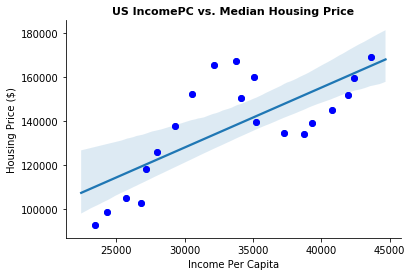

In [156]:
fig, ax = plt.subplots()

sns.regplot(fincombo.IncomePerCapita, fincombo.Median_Housing_Price)

ax.scatter(fincombo.IncomePerCapita, fincombo.Median_Housing_Price, color = 'b', linewidth = '1')
ax.set_title("US IncomePC vs. Median Housing Price", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Housing Price ($)")
ax.set_xlabel("Income Per Capita")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.show()


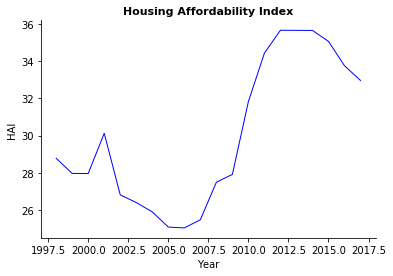

In [158]:
fig, ax = plt.subplots()

ax.plot(fincombo.index, fincombo.Housing_Affordability_Index, color = 'b', linewidth = '1')
ax.set_title("Housing Affordability Index", fontsize = 11, fontweight = "bold")
ax.set_ylabel("HAI")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

#add greyscale

# Graphs

In [159]:
yuma = combo.loc['04027']

In [160]:
yuma.set_index('TimePeriod',inplace = True)

In [161]:
yuma

,RegionName,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
TimePeriod,,,,,,,,
1998,Yuma County,149065,-0.346688,18026,-0.517996,82841.67,-0.696504,21.76
1999,Yuma County,155665,0.044276,17430,-0.033063,80341.67,-0.030178,21.69
2000,Yuma County,160576,0.031549,17929,0.028629,82283.33,0.024168,21.79
2001,Yuma County,162873,0.014305,18770,0.046907,77466.67,-0.058537,24.23
2002,Yuma County,165398,0.015503,20035,0.067395,87875.00,0.134359,22.80
2003,Yuma County,168003,0.015750,21330,0.064637,91333.33,0.039355,23.35
2004,Yuma County,172824,0.028696,23210,0.088139,99458.33,0.088960,23.34
2005,Yuma County,178816,0.034671,23944,0.031624,143475.00,0.442564,16.69
2006,Yuma County,183848,0.028141,24630,0.028650,177750.00,0.238892,13.86


In [174]:
yuma.index.tolist()

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

/Users/cole/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


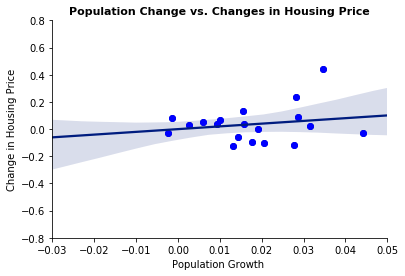

In [171]:
fig, ax = plt.subplots()

plt.style.use('seaborn-dark-palette')

sns.regplot(yuma.Pop_Change, yuma.Change_in_Housing_Price)

ax.scatter(yuma.Pop_Change, yuma.Change_in_Housing_Price, color = 'b', linewidth = '1')
ax.set_title("Population Change vs. Changes in Housing Price", fontsize = 11, fontweight = "bold")
ax.set_ylabel("Change in Housing Price")
ax.set_xlabel("Population Growth ")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(-0.03,0.05)
ax.set_ylim(-0.8,0.8)

plt.show() #VISUALIZING LINEAR RELATIONSHIPS 

In [163]:
print(plt.style.available) # make the graph aesthetically 

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


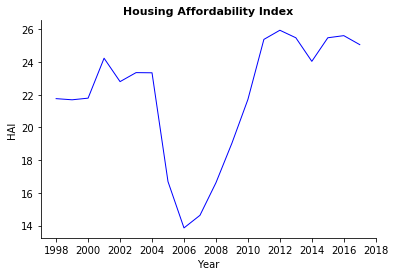

In [181]:
fig, ax = plt.subplots()

ax.plot(yuma.index, yuma.Housing_Affordability_Index, color = 'b', linewidth = '1')
ax.set_title("Housing Affordability Index", fontsize = 11, fontweight = "bold")
ax.set_ylabel("HAI")
ax.set_xlabel("Year")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xticks(np.arange(1998,2019,2))
#plt.axis('scaled')



plt.show()

In [165]:
combo.quantile(0.10) #Deer Lodge County

TimePeriod                      2000.000000
Pop                            14205.800000
Pop_Change                        -0.007605
IncomePerCapita                22569.900000
Change_in_IncomePerCapita         -0.025105
Median_Housing_Price           63875.000000
Change_in_Housing_Price           -0.071497
Housing_Affordability_Index       16.790000
Name: 0.1, dtype: float64

# function 1
- if user wants to look up a particular geocode/county name do the iloc to grab all the data (like what we did with ridgefield yesterday...)

In [232]:
def function1():
    df = combo.reset_index()
       
    user_input = input("Please enter one of the following options: GeoFips, TimePeriod ")
    
    if user_input in combo['GeoFips'].tolist():
        df = df.set_index('GeoFips')
        return df
        specific_case = df.loc[user_input]
    elif user_input in combo['TimePeriod'].tolist():
        df = df.set_index('TimePeriod')
        specific_case = df.loc[user_input]
    else: 
        user_input = input("Please enter one of the following options: GeoFips, TimePeriod ")

    return specific_case

In [226]:
def function1():
    df = combo.reset_index()
    return df

In [233]:
function1()

Please enter one of the following options: GeoFips, TimePeriod '01001'


KeyError: 'GeoFips'

In [ ]:
## function1('01001')

In [205]:
combo

,RegionName,TimePeriod,Pop,Pop_Change,IncomePerCapita,Change_in_IncomePerCapita,Median_Housing_Price,Change_in_Housing_Price,Housing_Affordability_Index
GeoFips,,,,,,,,,
01001,Autauga County,1998,42106,NaN,22073,NaN,110558.33,NaN,19.97
01001,Autauga County,1999,42963,0.020353,22948,0.039641,111250.00,0.006256,20.63
01001,Autauga County,2000,44021,0.024626,23699,0.032726,115125.00,0.034831,20.59
01001,Autauga County,2001,44889,0.019718,24682,0.041479,109325.00,-0.050380,22.58
01001,Autauga County,2002,45909,0.022723,24991,0.012519,118983.33,0.088345,21.00
01001,Autauga County,2003,46800,0.019408,26319,0.053139,122391.67,0.028646,21.50
01001,Autauga County,2004,48366,0.033462,27535,0.046202,128516.67,0.050044,21.43
01001,Autauga County,2005,49676,0.027085,28766,0.044707,133633.33,0.039813,21.53
01001,Autauga County,2006,51328,0.033255,29758,0.034485,150683.33,0.127588,19.75


# function 2 (user can search for a particular year 1998-2017) aggregated by mean in entire US use .loc function 

In [ ]:
#fincombo.to_excel("Finaldata.xlsx")